In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/raw/train_events.csv')
df = df.dropna()

In [3]:
df['hour'] = df.timestamp.str[11:13].astype(int)
df['minute'] = df.timestamp.str[14:16].astype(int)
df['second'] = df.timestamp.str[17:19].astype(int)

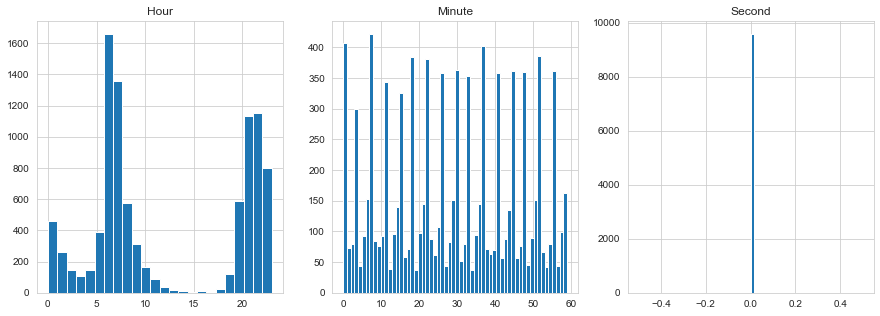

In [4]:
# make histograms for each time feature
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(df.hour, bins=24)
ax[0].set_title('Hour')
ax[1].hist(df.minute, bins=60)
ax[1].set_title('Minute')
ax[2].hist(df.second, bins=60)
ax[2].set_title('Second')
plt.show()

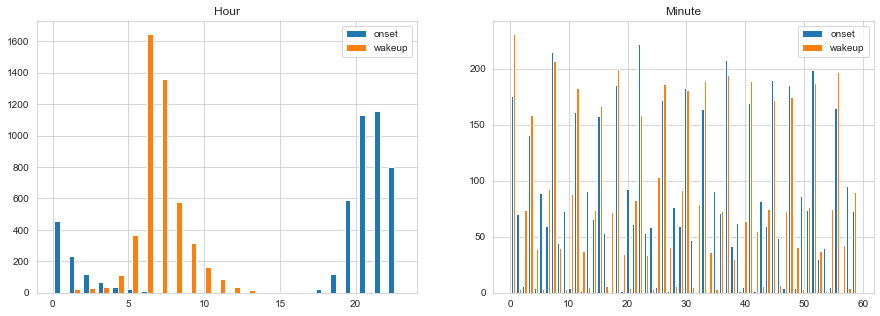

In [5]:
# Make plots again, make distinctions between the two 'event' types: 'onset' and 'wakeup'
df_onset = df[df.event == 'onset']
df_wakeup = df[df.event == 'wakeup']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist([df_onset.hour, df_wakeup.hour], bins=24, label=['onset', 'wakeup'])
ax[0].set_title('Hour')
ax[0].legend()
ax[1].hist([df_onset.minute, df_wakeup.minute], bins=60, label=['onset', 'wakeup'])
ax[1].set_title('Minute')
ax[1].legend()
plt.show()

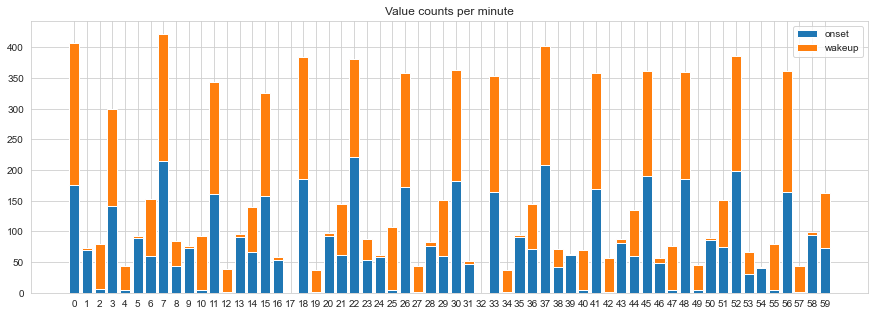

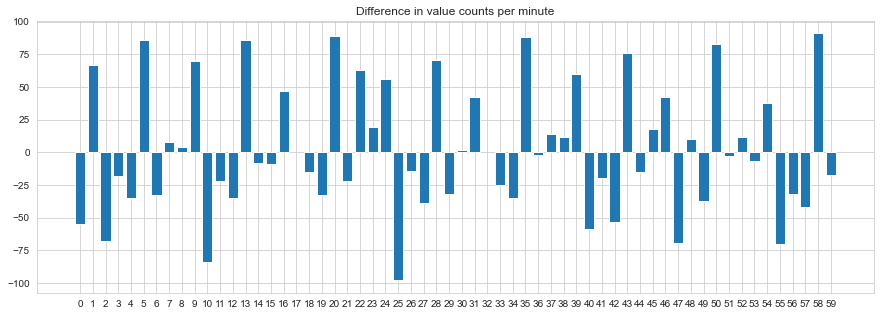

In [6]:
# compare value counts of the minute histogram
onset_counts = df_onset.minute.value_counts()
wakeup_counts = df_wakeup.minute.value_counts()
combined_counts = pd.concat([onset_counts, wakeup_counts], axis=1)
combined_counts.columns = ['onset', 'wakeup']

# plot the value counts per minute
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.bar(combined_counts.index, combined_counts.onset, label='onset')
ax.bar(combined_counts.index, combined_counts.wakeup, label='wakeup', bottom=combined_counts.onset)
ax.set_xticks(combined_counts.index)
ax.legend()
ax.set_title('Value counts per minute')
plt.show()

# plot the difference of the value counts per minute
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.bar(combined_counts.index, combined_counts.onset - combined_counts.wakeup)
ax.set_xticks(combined_counts.index)
ax.set_title('Difference in value counts per minute')
plt.show()

In [8]:
combined_counts['total'] = combined_counts.onset + combined_counts.wakeup
combined_counts = combined_counts.sort_values('total', ascending=False)
combined_counts

,onset,wakeup,total
7,215.0,207,422.0
0,176.0,231,407.0
37,208.0,194,402.0
52,199.0,187,386.0
18,185.0,200,385.0
22,222.0,159,381.0
30,183.0,181,364.0
56,165.0,197,362.0
45,190.0,172,362.0
48,185.0,175,360.0


Compare it with all the binary divisions of an hour

In [16]:
import itertools
divs = []
levels = 5
for i in range(levels):
    size = 60 / (2 ** i)
    divs.append(np.arange(0, 60, size))
divs

[array([0.]),
 array([ 0., 30.]),
 array([ 0., 15., 30., 45.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5]),
 array([ 0.  ,  3.75,  7.5 , 11.25, 15.  , 18.75, 22.5 , 26.25, 30.  ,
        33.75, 37.5 , 41.25, 45.  , 48.75, 52.5 , 56.25])]

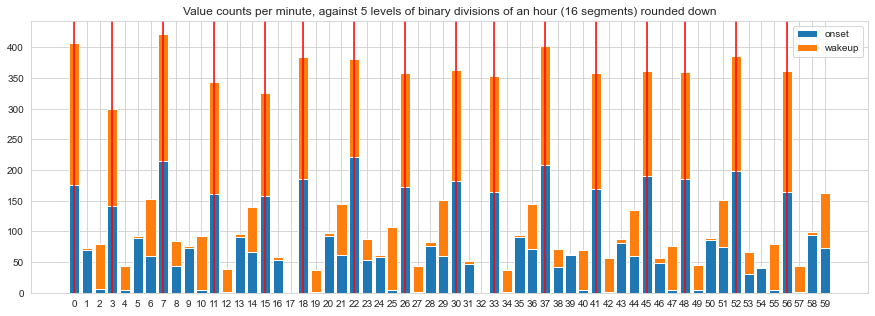

In [29]:
# plot the value counts again, but highlight the last level of divisions
_, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.bar(combined_counts.index, combined_counts.onset, label='onset')
ax.bar(combined_counts.index, combined_counts.wakeup, label='wakeup', bottom=combined_counts.onset)
ax.set_xticks(combined_counts.index)
ax.set_title(f'Value counts per minute, against {levels} levels of binary divisions of an hour '
             f'({2**(levels-1)} segments) rounded down')
for div in divs[-1]:
    ax.axvline(np.floor(div), color='red')
ax.legend()
plt.show()